# Q&A Activity Question Week -10


Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## Import the required libraries

## 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
data.info()
#summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
data.isna().sum()
#checking any null values present in dataset

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [5]:
#display columns in dataset
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [6]:
data.shape
#count of rows and columns

(9, 7)

## 2. Reset the index as "name" as the index.

In [7]:
data = pd.read_csv('employee.csv',index_col='name')
data.head()        

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


## 3. Select rows for specific names Jack Morgan and Josh wills

In [8]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance”.

In [9]:
data[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5. Display employee who has more than 700 performance score

In [10]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6. Display employee who has more than 500 and less than 700 performance score

In [11]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset.

In [12]:
#show both numerical and categorical data present
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

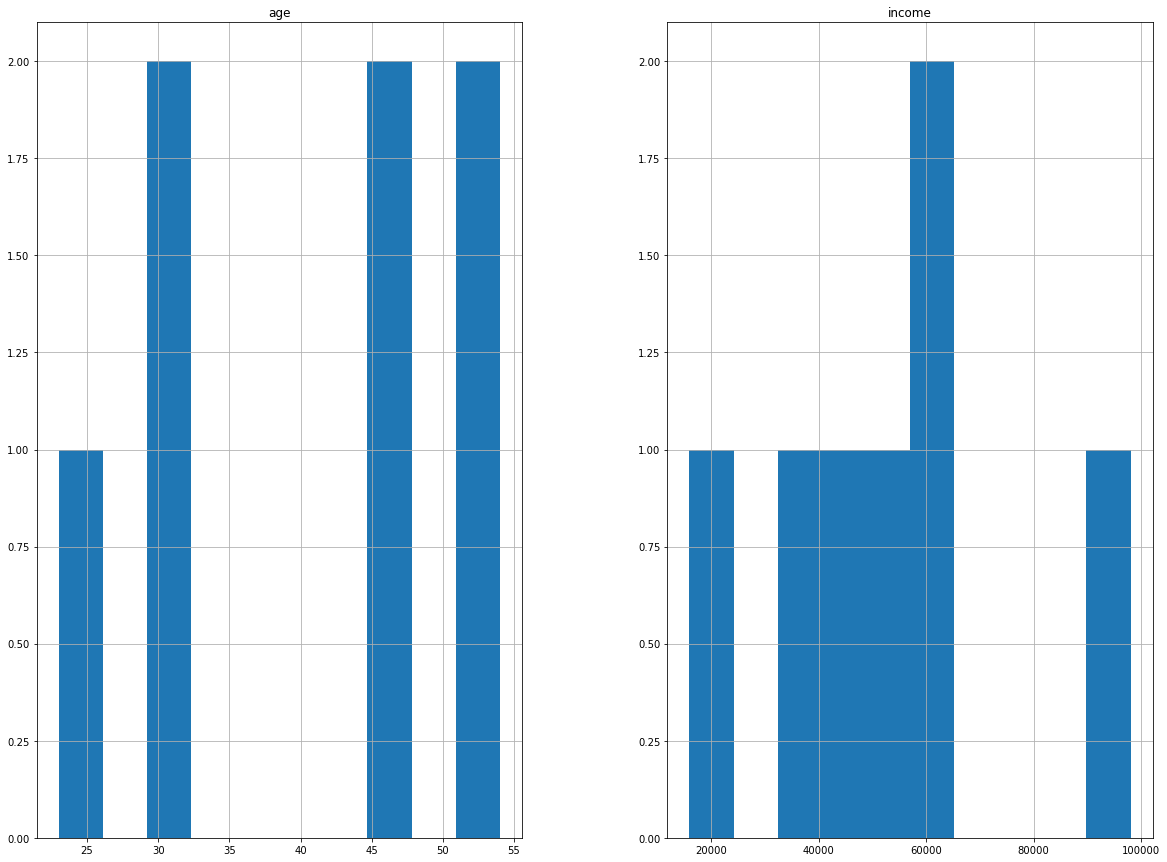

In [13]:
#plot numerical data and check skewnwess
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [14]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [15]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [16]:
for i in ['age','income']:
    data[i]=data[i].fillna(data[i].median())

In [17]:
data.isna().sum()
#check it

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [18]:
data[data.isna().any(axis=1)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649


In [19]:
data.gender

name
Allen Smith      NaN
S Kumar            F
Jack Morgan        M
Ying Chin          F
Dheeraj Patel      F
Satyam Sharma    NaN
James Authur       F
Josh Wills         F
Leo Duck           M
Name: gender, dtype: object

In [20]:
data['gender'] = data['gender'].fillna('F')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 8. Check the outliers and handle outliers in performance score using Percentiles.

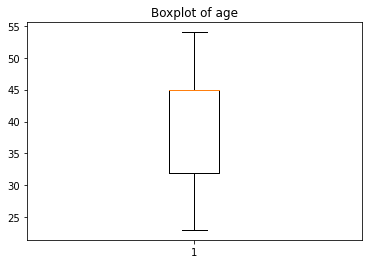

In [21]:
#plot the age column
plt.boxplot(data['age'])
plt.title('Boxplot of age')
plt.show()

In [22]:
#no outliers found

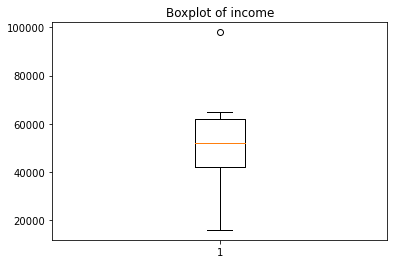

In [23]:
#plot the income column
plt.boxplot(data['income'])
plt.title('Boxplot of income')
plt.show()

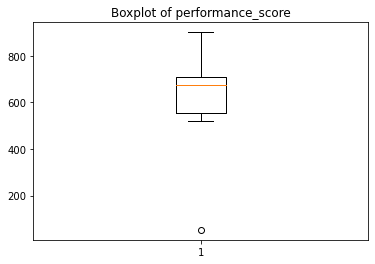

In [24]:
#plot the performance_score column
plt.boxplot(data['performance_score'])
plt.title('Boxplot of performance_score')
plt.show()

In [25]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [26]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("Lower limit",low_limit)
print("Upper limit",up_limit)
#check the inter quartile range (IQR),lower limit and upper limit

IQR: 155.0
Lower limit 323.5
Upper limit 943.5


In [27]:
#loop to remove values below lower limit and values bove upper limit
outlier=[]
for x in data['performance_score']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[53]


In [28]:
#find index of these outliers
ind1=data['performance_score']<low_limit
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [29]:
ind2 = data['performance_score']>up_limit
data.loc[ind2].index

Index([], dtype='object', name='name')

In [30]:
#removing outliers
data.drop(['James Authur'],inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


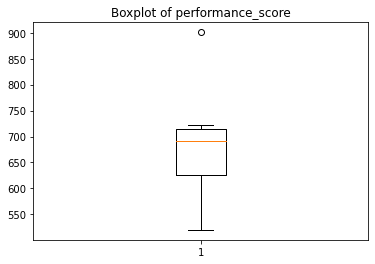

In [31]:
#plot the performance_score column
plt.boxplot(data['performance_score'])
plt.title('Boxplot of performance_score')
plt.show()

In [32]:
#we can see the oulier is removed

## 9. Check the gender column and do Dummy encoding.


In [33]:
data.gender

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [34]:
data.gender.nunique()

2

In [35]:
data=pd.get_dummies(data)
data

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52000.0,723,1,0,0,1,0,0,0,1,0
S Kumar,45.0,16000.0,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.0,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.0,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.0,711,1,0,0,1,0,0,1,0,0
Satyam Sharma,45.0,62000.0,649,1,0,0,0,1,0,0,1,0
Josh Wills,54.0,52000.0,901,1,0,1,0,0,0,0,1,0
Leo Duck,23.0,98000.0,709,0,1,0,0,1,0,0,0,1


## 10.Do the standard scaling on the feature performance score

In [36]:
x=data.drop('performance_score',axis=1)
x=pd.DataFrame(x)

In [37]:
x.describe()

,age,income,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,39.875000,52750.000000,0.75000,0.25000,0.375000,0.25000,0.375000,0.125000,0.25000,0.500000,0.125000
std,10.343217,24099.496142,0.46291,0.46291,0.517549,0.46291,0.517549,0.353553,0.46291,0.534522,0.353553
min,23.000000,16000.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,31.500000,40250.000000,0.75000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,52000.000000,1.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.500000,0.000000
75%,45.000000,62750.000000,1.00000,0.25000,1.000000,0.25000,1.000000,0.000000,0.25000,1.000000,0.000000
max,54.000000,98000.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [38]:
from sklearn import preprocessing
standard_scaling= preprocessing.StandardScaler()
x=standard_scaling.fit_transform(x)

In [39]:
x=pd.DataFrame(x)

In [40]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00
mean,-2.775558e-17,0.000000,2.775558e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17,-6.938894e-17,-2.775558e-17,0.000000,-5.551115e-17
std,1.069045e+00,1.069045,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045,1.069045e+00
min,-1.744151e+00,-1.630217,-1.732051e+00,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01
25%,-8.656157e-01,-0.554495,0.000000e+00,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01
50%,5.297052e-01,-0.033270,5.773503e-01,-5.773503e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01,-3.779645e-01,-5.773503e-01,0.000000,-3.779645e-01
75%,5.297052e-01,0.443596,5.773503e-01,0.000000e+00,1.290994e+00,0.000000e+00,1.290994e+00,-3.779645e-01,0.000000e+00,1.000000,-3.779645e-01
max,1.459919e+00,2.007274,5.773503e-01,1.732051e+00,1.290994e+00,1.732051e+00,1.290994e+00,2.645751e+00,1.732051e+00,1.000000,2.645751e+00


In [41]:
y = data['performance_score']
x= data.drop('performance_score', axis=1)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#20 % text size and 80% training size
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print("MSE is :", mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print("R squared vaue is :", r2_score(y_test,predictions))

MSE is : 22142.060576450036
R squared vaue is : -4.322290866282083
